In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import zipfile
import os
import pathlib
import numpy as np
import matplotlib.image as mpimg

In [2]:
# import the dataset (Zero to mastery https://github.com/mrdbourke/tensorflow-deep-learning)
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2021-12-16 23:05:28--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.136.128, 209.85.200.128, 74.125.129.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.136.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  81.5MB/s    in 1.3s    

2021-12-16 23:05:29 (81.5 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [3]:
# get to know the data, become one with it
def view_random_image(target_dir, target_class):
  import random
  """
  Visualize random image from a specific directory with a specific
  class.
  """
  # setup target directory
  folder = target_dir + target_class

  # get random image and plot
  random_img = random.sample(os.listdir(folder), 1)

  # read image and plot
  img = mpimg.imread(folder + "/" + random_img[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"-- Shape of image: {img.shape} --")

In [4]:
"""
Uncomment to visualize data
view_random_image("pizza_steak/train/", "pizza")
"""

'\nUncomment to visualize data\nview_random_image("pizza_steak/train/", "pizza")\n'

In [5]:
# get to know the output and the output accuracy
def plot_loss_accuracy(history):
  """
  Plot loss and accuracy of neural network fitted.
  """
  hist_dict = history.history
  loss = hist_dict["loss"]
  val_loss = hist_dict["val_loss"]
  accuracy = hist_dict["accuracy"]
  val_accuracy = hist_dict["val_accuracy"]
  epochs = range(len(hist_dict["loss"]))

  # plot loss curves
  plt.figure()
  plt.plot(epochs, loss, label="Training loss")
  plt.plot(epochs, val_loss, label="Val loss")
  plt.title("Loss Curves")
  plt.xlabel("Epochs")
  plt.legend()

  # plot accuracy curves
  plt.figure()
  plt.plot(epochs, accuracy, label="Training Accuracy")
  plt.plot(epochs, val_accuracy, label="Val Accuracy")
  plt.title("Accuracy Curves")
  plt.xlabel("Epochs")
  plt.legend()

In [35]:
# observe differences between two different models
def plot_vs(history_1, history_2):
  """
  plots the differences between two models, helper to compare
  accuary and loss. 
  """

  hist_1 = history_1.history
  hist_2 = history_2.history
  val_loss_1 = hist_1["val_loss"]
  val_loss_2 = hist_2["val_loss"]
  val_accuracy_1 = hist_1["val_accuracy"]
  val_accuracy_2 = hist_2["val_accuracy"]
  epochs = range(len(hist_1["loss"]))

  # plot loss curves
  plt.figure()
  plt.plot(epochs, val_loss_1, label="Val loss_ history_1")
  plt.plot(epochs, val_loss_2, label="Val loss_ history_2")
  plt.title("Loss Curves")
  plt.xlabel("Epochs")
  plt.legend()

  # plot accuracy curves
  plt.figure()
  plt.plot(epochs, val_accuracy_1, label="Val accuracy history_1")
  plt.plot(epochs, val_accuracy_2, label="Val accuracy history_2")
  plt.title("Accuracy Curves")
  plt.xlabel("Epochs")
  plt.legend()

In [6]:
# set seed for notebook
tf.random.set_seed(16)

# preprocess data
train_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)
test_validate_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

# directories
train_dir = "/content/pizza_steak/train/"
test_dir = "/content/pizza_steak/test/"

# import data into batches
train_data = train_data_generator.flow_from_directory(directory=train_dir,
                                                      batch_size=32,
                                                      target_size=(224,224),
                                                      class_mode="binary",
                                                      seed=16)

test_data = test_validate_data_generator.flow_from_directory(directory=train_dir,
                                                      batch_size=32,
                                                      target_size=(224,224),
                                                      class_mode="binary",
                                                      seed=16)


Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [27]:
# set the seed
tf.random.set_seed(16)
# create baseline model
base_model = tf.keras.Sequential([
  # input layer
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, activation="relu",
                         input_shape=(224,224,3)),
  # hidden layers
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),
  # converet to vector
  tf.keras.layers.Flatten(),
  # output layer (binary)
  tf.keras.layers.Dense(units=1, activation="sigmoid")])

# compile model
base_model.compile(loss=tf.keras.losses.binary_crossentropy,
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])

# fit the model
base_history = base_model.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                              validation_data=test_data, validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 18s 357ms/step - loss: 0.5576 - accuracy: 0.7067 - val_loss: 0.4235 - val_accuracy: 0.8167
Epoch 2/10
47/47 [==============================] - 16s 350ms/step - loss: 0.4259 - accuracy: 0.8053 - val_loss: 0.3676 - val_accuracy: 0.8440
Epoch 3/10
47/47 [==============================] - 16s 350ms/step - loss: 0.3937 - accuracy: 0.8313 - val_loss: 0.3344 - val_accuracy: 0.8533
Epoch 4/10
47/47 [==============================] - 16s 347ms/step - loss: 0.3334 - accuracy: 0.8673 - val_loss: 0.3173 - val_accuracy: 0.8627
Epoch 5/10
47/47 [==============================] - 16s 348ms/step - loss: 0.2859 - accuracy: 0.8893 - val_loss: 0.2287 - val_accuracy: 0.9267
Epoch 6/10
47/47 [==============================] - 16s 346ms/step - loss: 0.2663 - accuracy: 0.8980 - val_loss: 0.2096 - val_accuracy: 0.9340
Epoch 7/10
47/47 [==============================] - 16s 348ms/step - loss: 0.2026 - accuracy: 0.9280 - val_loss: 0.1626 - val_accuracy: 0.9487

In [8]:
# view baseline performance
"""
Uncomment to visualize
plot_loss_accuracy(base_history)
"""

'\nUncomment to visualize\nplot_loss_accuracy(base_history)\n'

In [9]:
# try data augmentation for the pictures to increace accuracy

# preprocess augmented data
aug_train_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

augmented_train_data = aug_train_data_generator.flow_from_directory(train_dir, target_size=(224,224),
                                                                class_mode="binary", batch_size=32, 
                                                                shuffle=True, seed=16)
augmented_base_model = tf.keras.Sequential([
  # input layer
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, strides=1, padding="valid",
                         activation="relu", input_shape=(224,224,3)),
  # hidden layers
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),
  # converet to vector
  tf.keras.layers.Flatten(),
  # output layer (binary)
  tf.keras.layers.Dense(units=1, activation="sigmoid")])

# compile model
augmented_base_model.compile(loss=tf.keras.losses.binary_crossentropy,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

# UNCOMMENT for learning rate plotting
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))
# add to fitting the model the following:
callbacks=[lr_scheduler]


# fit the model
augmented_base_history = augmented_base_model.fit(augmented_train_data, epochs=25, steps_per_epoch=len(augmented_train_data),
                              validation_data=test_data, validation_steps=len(test_data), callbacks=[lr_scheduler])

Found 1500 images belonging to 2 classes.
Epoch 1/25
47/47 [==============================] - 33s 686ms/step - loss: 0.6876 - accuracy: 0.5247 - val_loss: 0.6612 - val_accuracy: 0.6267 - lr: 1.0000e-04
Epoch 2/25
47/47 [==============================] - 31s 667ms/step - loss: 0.6514 - accuracy: 0.6480 - val_loss: 0.5947 - val_accuracy: 0.7193 - lr: 1.1220e-04
Epoch 3/25
47/47 [==============================] - 31s 671ms/step - loss: 0.6099 - accuracy: 0.6827 - val_loss: 0.5302 - val_accuracy: 0.7593 - lr: 1.2589e-04
Epoch 4/25
47/47 [==============================] - 32s 689ms/step - loss: 0.5739 - accuracy: 0.7020 - val_loss: 0.4861 - val_accuracy: 0.7880 - lr: 1.4125e-04
Epoch 5/25
47/47 [==============================] - 32s 690ms/step - loss: 0.5512 - accuracy: 0.7187 - val_loss: 0.4954 - val_accuracy: 0.7527 - lr: 1.5849e-04
Epoch 6/25
47/47 [==============================] - 31s 671ms/step - loss: 0.5259 - accuracy: 0.7373 - val_loss: 0.4536 - val_accuracy: 0.7900 - lr: 1.7783e-0

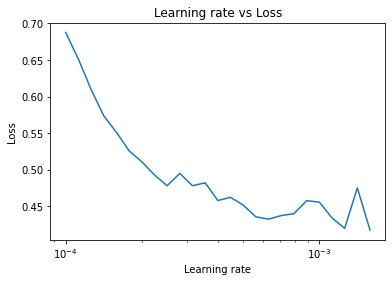

In [10]:
# get the best learning rate for the model
# plot the learning rate vs loss
lrs = 1e-4 * (10**(tf.range(25)/20))
plt.semilogx(lrs, augmented_base_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss");

In [25]:
# create model with the best learning rate
tf.random.set_seed(16)
optimized_model = tf.keras.Sequential([
  # input layer
  tf.keras.layers.Conv2D(filters=10, strides=1, kernel_size=3, padding="valid",
                         activation="relu", input_shape=(224,224,3)),
  # hidden layers
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2),
  tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
  tf.keras.layers.MaxPool2D(),
  # convert to vector
  tf.keras.layers.Flatten(),
  # optput layer
  tf.keras.layers.Dense(units=1, activation="sigmoid")])

# compile model
optimized_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0016),
                        loss=tf.keras.losses.binary_crossentropy,
                        metrics=["accuracy"])

# fit model
optimized_history = optimized_model.fit(train_data, epochs=10, steps_per_epoch=len(train_data),
                                        validation_data=test_data, validation_steps=len(test_data))


Epoch 1/10
47/47 [==============================] - 17s 354ms/step - loss: 0.7059 - accuracy: 0.5607 - val_loss: 0.5943 - val_accuracy: 0.7140
Epoch 2/10
47/47 [==============================] - 16s 346ms/step - loss: 0.5013 - accuracy: 0.7700 - val_loss: 0.4623 - val_accuracy: 0.7893
Epoch 3/10
47/47 [==============================] - 16s 343ms/step - loss: 0.4317 - accuracy: 0.8073 - val_loss: 0.4132 - val_accuracy: 0.8267
Epoch 4/10
47/47 [==============================] - 17s 365ms/step - loss: 0.3977 - accuracy: 0.8253 - val_loss: 0.3318 - val_accuracy: 0.8727
Epoch 5/10
47/47 [==============================] - 16s 347ms/step - loss: 0.3438 - accuracy: 0.8533 - val_loss: 0.3240 - val_accuracy: 0.8593
Epoch 6/10
47/47 [==============================] - 16s 345ms/step - loss: 0.2779 - accuracy: 0.8907 - val_loss: 0.1867 - val_accuracy: 0.9527
Epoch 7/10
47/47 [==============================] - 16s 343ms/step - loss: 0.1973 - accuracy: 0.9320 - val_loss: 0.1465 - val_accuracy: 0.9500

In [28]:
# plot accuacy and loss curves - UNCOMMENT to observe
# plot_loss_accuracy(optimized_history)

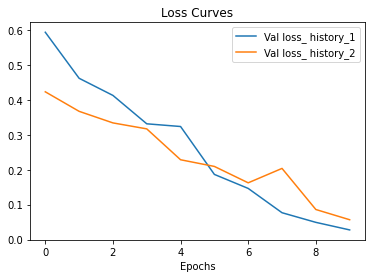

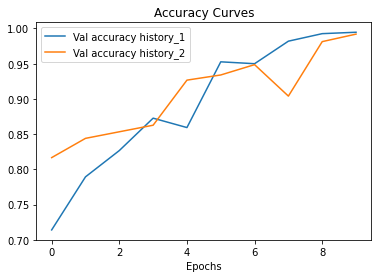

In [36]:
# plot loss and accuracy between optimized final model and baseline model
plot_vs(optimized_history, base_history)

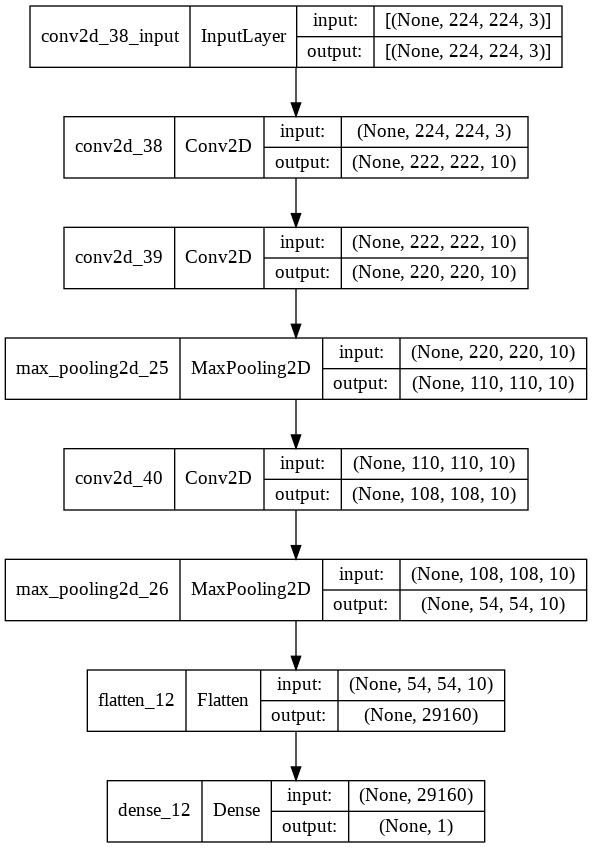

In [34]:
# plot the shape of the model
from tensorflow.keras.utils import plot_model
plot_model(base_model, show_shapes=True)